In [1]:
import pandas as pd

dataset = pd.read_csv('data set.csv',parse_dates=[0])


dataset.head()


C:\Users\hp-pc\AppData\Local\Temp\ipykernel_17716\959588323.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset = pd.read_csv('data set.csv',parse_dates=[0])


,DATA,Attack Type,CAN Message,Attack Image
0,Training Set,Normal Data,"1,171,637.00",NaN
1,Test Set,DOS Attack data,"3,665,771.00","17,128.00"
2,Test Set,FUZZY Attack data,"3,838,860.00","20,317.00"
3,Test Set,RPM Attack data,"4,621,702.00","32,501.00"
4,Test Set,GEAR Attack data,"4,443,142.00","29,751.00"


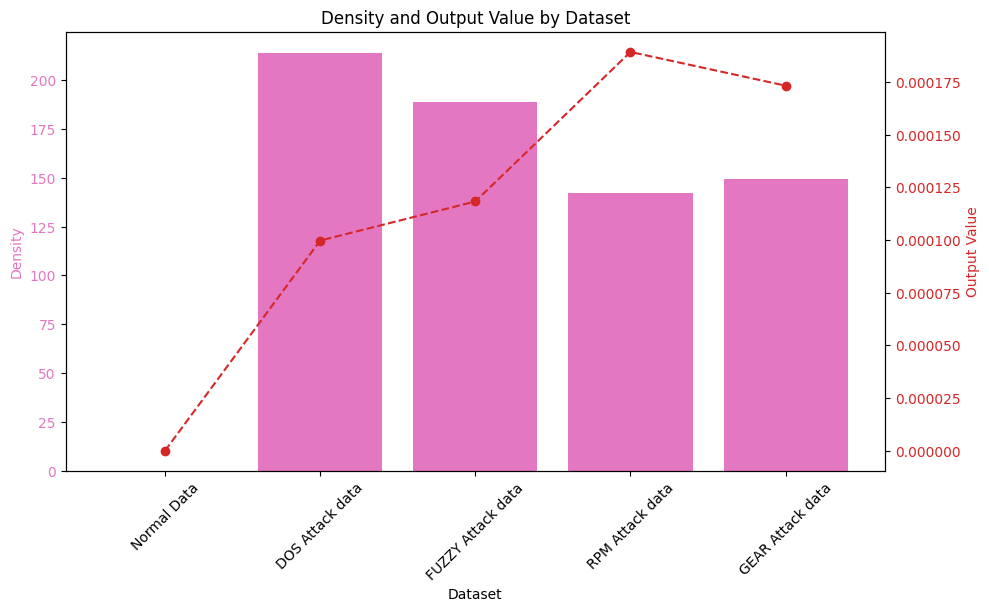

In [6]:
"""
# output the graph with x and y datasets
# use scikit-learn (sklearn) provides numerical tool for data processing 
# use One Hot Encoder Function here to convert categorical and numerical data into binary factors.


fig = pd.line(dataset,)
"data set.csv"
"""
""""data set.csv"
import matplotlib.pyplot as plt

# Data
data = [
    ("Training Set", "Normal Data", 171637637, None),
    ("Test Set", "DOS Attack data", 3665771, 17128),
    ("Test Set", "FUZZY Attack data", 3838860, 20317),
    ("Test Set", "RPM Attack data", 4621702, 32501),
    ("Test Set", "GEAR Attack data", 4443142, 29751)
]

# Extracting values for plotting
labels = [d[1] for d in data]
can_messages = [d[2] for d in data]
attack_images = [d[3] if d[3] is not None else 0 for d in data]  # Replace None with 0

# Calculate density
density = [can_messages[i] / attack_images[i] if attack_images[i] != 0 else 0 for i in range(len(data))]

# Calculate output value (ratio of abnormal CAN messages to total CAN messages)
output_value = [attack_images[i] / can_messages[i] if can_messages[i] != 0 else 0 for i in range(len(data))]

# Plotting
x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot density
color = 'tab:blue'
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Density', color=color)
ax1.bar(x, density, color=color, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)

# Create a second y-axis for output value
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Output Value', color=color)
ax2.plot(x, output_value, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Density and Output Value by Dataset')

plt.show()
""""data set.csv"

import matplotlib.pyplot as plt

# Data
data = [
    ("Training Set", "Normal Data", 171637637, None),
    ("Test Set", "DOS Attack data", 3665771, 17128),
    ("Test Set", "FUZZY Attack data", 3838860, 20317),
    ("Test Set", "RPM Attack data", 4621702, 32501),
    ("Test Set", "GEAR Attack data", 4443142, 29751)
]

# Extracting values for plotting
labels = [d[1] for d in data]
can_messages = [d[2] for d in data]
attack_images = [d[3] if d[3] is not None else 0 for d in data]  # Replace None with 0

# Calculate density
density = [can_messages[i] / attack_images[i] if attack_images[i] != 0 else 0 for i in range(len(data))]

# Calculate output value (ratio of abnormal CAN messages to normal data)
output_value = [attack_images[i] / can_messages[0] if can_messages[0] != 0 else 0 for i in range(len(data))]

# Plotting
x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot density
color = 'tab:pink'
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Density', color=color)
ax1.bar(x, density, color=color, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)

# Create a second y-axis for output value
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Output Value', color=color)
ax2.plot(x, output_value, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Density and Output Value by Dataset')
plt.show()


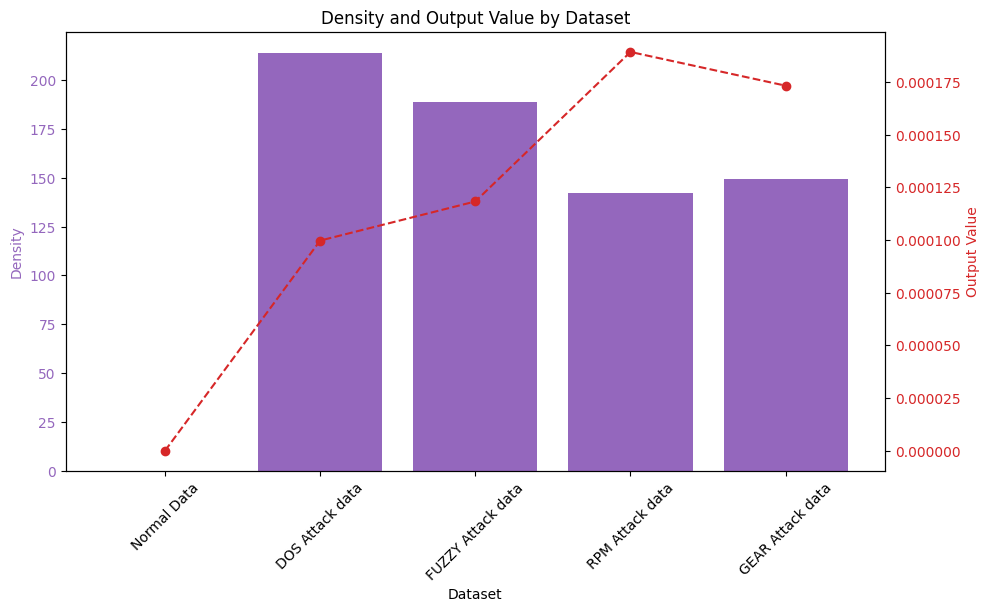

' In this modified version, datasets contains the categorical data for the "Dataset" variable. \nWe then use NumPy to perform one-hot encoding, converting each dataset into a binary vector. \nThe resulting one-hot encoding matrix is stored in one_hot_encoding. You can use this matrix as features in your analysis.'

In [7]:
""" need to convert categorical variables into a numerical representation. 
Since you want to encode the "Dataset" variable, 
which contains categorical data, you can use one-hot encoding to represent each dataset as a binary vector."""
import matplotlib.pyplot as plt
import numpy as np

# Data
data = [
    ("Training Set", "Normal Data", 171637637, None),
    ("Test Set", "DOS Attack data", 3665771, 17128),
    ("Test Set", "FUZZY Attack data", 3838860, 20317),
    ("Test Set", "RPM Attack data", 4621702, 32501),
    ("Test Set", "GEAR Attack data", 4443142, 29751)
]

# Extracting values for plotting
labels = [d[1] for d in data]
can_messages = [d[2] for d in data]
attack_images = [d[3] if d[3] is not None else 0 for d in data]  # Replace None with 0

# One-hot encoding for 'Dataset'
datasets = [d[0] for d in data]
unique_datasets = np.unique(datasets)
one_hot_encoding = np.zeros((len(data), len(unique_datasets)), dtype=int)
for i, dataset in enumerate(datasets):
    one_hot_encoding[i, np.where(unique_datasets == dataset)] = 1

# Calculate density
density = [can_messages[i] / attack_images[i] if attack_images[i] != 0 else 0 for i in range(len(data))]

# Calculate output value (ratio of abnormal CAN messages to normal data)
output_value = [attack_images[i] / can_messages[0] if can_messages[0] != 0 else 0 for i in range(len(data))]

# Plotting
x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot density
color = 'tab:purple'
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Density', color=color)
ax1.bar(x, density, color=color, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)

# Create a second y-axis for output value
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Output Value', color=color)
ax2.plot(x, output_value, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Density and Output Value by Dataset')
plt.show()


""" In this modified version, datasets contains the categorical data for the "Dataset" variable. 
We then use NumPy to perform one-hot encoding, converting each dataset into a binary vector. 
The resulting one-hot encoding matrix is stored in one_hot_encoding. You can use this matrix as features in your analysis."""